In [ ]:
'''
End to End Model Development for Credit Card Project
'''

'\nEnd to End Model Development for Credit Card Project\n'

In [ ]:
import os
import sys
import math
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
# loading the data

df = pd.read_csv('creditcard.csv')
df.shape

(150002, 18)

In [ ]:
# preprocessing_stage

df.sample(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
39114,0.0,0.013447,40.0,Female,North,8310.0,Ownhouse,Officer3,Post-Grad,0.0,0.232944,8310.0,6.0,0.0,2.0,0.0,3.0,Good
136834,0.0,0.085726,64.0,Male,West,NaN,Rented,Non-officer,Professional,0.0,6114.000000,NaN,9.0,0.0,3.0,0.0,0,Good
22958,0.0,0.324172,62.0,Male,North,3638.0,Ownhouse,Non-officer,Graduate,0.0,0.428414,3638.0,7.0,0.0,1.0,0.0,0.0,Good
57414,0.0,0.157169,64.0,Male,East,19750.0,Rented,Self_Emp,Professional,0.0,0.251937,19750.0,9.0,0.0,1.0,0.0,1.0,Good
34183,0.0,0.064249,64.0,Female,North,NaN,Ownhouse,Self_Emp,PhD,0.0,932.000000,NaN,8.0,0.0,1.0,0.0,0.0,Good
80928,0.0,0.022391,68.0,Female,Central,NaN,Ownhouse,Non-officer,Professional,0.0,3132.000000,NaN,6.0,0.0,2.0,0.0,0.0,Good
146259,0.0,1.000000,59.0,Male,South,NaN,Rented,Officer2,Professional,0.0,1693.000000,NaN,1.0,0.0,1.0,0.0,0,Good


In [ ]:
print(f'Number of rows in the data : {df.shape[0]} and Number of columns : {df.shape[1]}')

Number of rows in the data : 150002 and Number of columns : 18


In [ ]:
df.shape

(150002, 18)

In [ ]:
# we need to find the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [ ]:
df.isnull().sum()

,0
NPA Status,2
RevolvingUtilizationOfUnsecuredLines,2
age,2
Gender,2
Region,2
MonthlyIncome,29733
Rented_OwnHouse,2
Occupation,2
Education,2
NumberOfTime30-59DaysPastDueNotWorse,2


In [ ]:
df = df.drop([150000,150001],axis=0)

In [ ]:
df.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,29731
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
df['NumberOfDependents'] = pd.to_numeric(df['NumberOfDependents'])
df['NumberOfDependents'].dtype

dtype('float64')

In [ ]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [ ]:
# due to overcome the data leakage problem we are going to split the data in initial stage only

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
len(X_train),len(y_train)

(135000, 135000)

In [ ]:
len(X_test),len(y_test)

(15000, 15000)

In [ ]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26738
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
X_train.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,NaN,3.0,0.0,0.0,0.0,0.0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,3060.0,5.0,0.0,0.0,0.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,15833.0,16.0,0.0,3.0,0.0,1.0
57742,0.0,0.715410,43.0,Male,East,5882.0,Ownhouse,Officer3,Professional,0.0,0.135305,5882.0,11.0,0.0,0.0,0.0,1.0
43651,0.0,0.000000,49.0,Male,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,871.000000,NaN,21.0,0.0,2.0,0.0,4.0
21898,0.0,0.052705,27.0,Male,North,NaN,Rented,Non-officer,Graduate,0.0,2025.000000,NaN,8.0,0.0,2.0,0.0,NaN
66140,0.0,0.001447,50.0,Male,Central,7271.0,Ownhouse,Self_Emp,Professional,1.0,0.582371,7271.0,8.0,0.0,2.0,0.0,0.0


In [ ]:
X_train['MonthlyIncome'][135986]==X_train['MonthlyIncome.1'][135986]

False

In [ ]:
np.isnan(X_train['MonthlyIncome'][135986])==np.isnan(X_train['MonthlyIncome.1'][135986])

True

In [ ]:
# since MonthlyIncome and MonthlyIncome.1 columns looks similar so lets compare
c = []
for i in X_train.index:
  if np.isnan(X_train['MonthlyIncome'][i])==np.isnan(X_train['MonthlyIncome.1'][i]):
    pass
  elif X_train['MonthlyIncome'][i]==X_train['MonthlyIncome.1'][i]:
    pass
  else:
    c.append(i)
print(c)

[]


In [ ]:
X_train = X_train.drop(['MonthlyIncome.1'],axis=1)
X_test = X_test.drop(['MonthlyIncome.1'],axis=1)

In [ ]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26738
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
# Handling missing values
# we are going to apply random_sample_imputation technique on both columns which are having null values

def random_sample(X_train,var):
  X_train[var+"_replaced"] = X_train[var].copy()
  s = X_train[var].dropna().sample(X_train[var].isnull().sum() , random_state = 42)
  s.index = X_train[X_train[var].isnull()].index
  X_train.loc[X_train[var].isnull() , var+'_replaced'] = s

In [ ]:
col = ['MonthlyIncome','NumberOfDependents']
for j in col:
  random_sample(X_train,j)

In [ ]:
X_train.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_replaced,NumberOfDependents_replaced
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,3.0,0.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,5.0,0.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,16.0,0.0,3.0,0.0,1.0,15833.0,1.0
57742,0.0,0.715410,43.0,Male,East,5882.0,Ownhouse,Officer3,Professional,0.0,0.135305,11.0,0.0,0.0,0.0,1.0,5882.0,1.0
43651,0.0,0.000000,49.0,Male,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,871.000000,21.0,0.0,2.0,0.0,4.0,8137.0,4.0
21898,0.0,0.052705,27.0,Male,North,NaN,Rented,Non-officer,Graduate,0.0,2025.000000,8.0,0.0,2.0,0.0,NaN,6930.0,0.0
66140,0.0,0.001447,50.0,Male,Central,7271.0,Ownhouse,Self_Emp,Professional,1.0,0.582371,8.0,0.0,2.0,0.0,0.0,7271.0,0.0


In [ ]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26738
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


Std of MonthlyIncome Feature : 14754.418707270997
Std of MonthlyIncome_replaced Feature : 13745.249004806647

Std of NumberOfDependents Feature : 1.1146446970540291
Std of NumberOfDependents_replaced Feature : 1.114732899930453


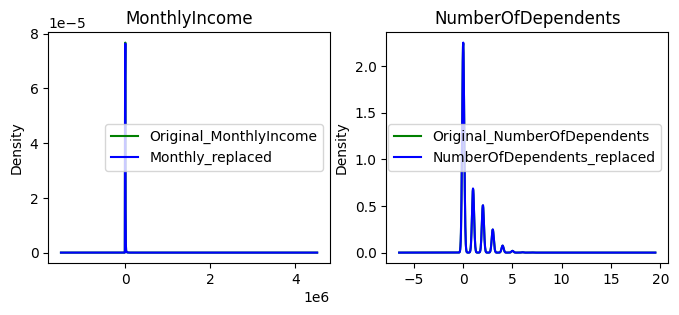

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('MonthlyIncome')
X_train['MonthlyIncome'].plot(kind='kde',color='g',label='Original_MonthlyIncome')
X_train['MonthlyIncome_replaced'].plot(kind='kde',color='b',label='Monthly_replaced')

plt.legend(loc = 0)

plt.subplot(1,2,2)
plt.title('NumberOfDependents')
X_train['NumberOfDependents'].plot(kind='kde',color='g',label='Original_NumberOfDependents')
X_train['NumberOfDependents_replaced'].plot(kind='kde',color='b',label='NumberOfDependents_replaced')

plt.legend(loc = 0)

print(f'Std of MonthlyIncome Feature : {X_train["MonthlyIncome"].std()}')
print(f'Std of MonthlyIncome_replaced Feature : {X_train["MonthlyIncome_replaced"].std()}')
print()
print(f'Std of NumberOfDependents Feature : {X_train["NumberOfDependents"].std()}')
print(f'Std of NumberOfDependents_replaced Feature : {X_train["NumberOfDependents_replaced"].std()}')
plt.show()

In [ ]:
# same process on the X_test null value columns
X_test.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,2993
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
# we are going to apply random_sample_imputation technique on both columns which are having null values
def random_sample(X_test,var):
  X_test[var+"_replaced"] = X_test[var].copy()
  s = X_test[var].dropna().sample(X_test[var].isnull().sum() , random_state = 42)
  s.index = X_test[X_test[var].isnull()].index
  X_test.loc[X_test[var].isnull() , var+'_replaced'] = s

In [ ]:
col = ['MonthlyIncome','NumberOfDependents']
for j in col:
  random_sample(X_test,j)

In [ ]:
X_test.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_replaced,NumberOfDependents_replaced
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,7667.0,0.0
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,7750.0,0.0
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,6000.0,3.0
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0.0,4958.0,0.0
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0.0,7480.0,0.0
96370,0.0,0.003231,79.0,Female,Central,NaN,Ownhouse,Non-officer,Graduate,0.0,5.000000,6.0,0.0,0.0,0.0,0.0,3466.0,0.0
49742,0.0,0.124479,48.0,Female,East,13686.0,Rented,Self_Emp,Post-Grad,0.0,0.610872,14.0,0.0,2.0,0.0,1.0,13686.0,1.0


In [ ]:
X_test.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,2993
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


Std of MonthlyIncome Feature : 10477.73724208986
Std of MonthlyIncome_replaced Feature : 9668.675725547122

Std of NumberOfDependents Feature : 1.118886446230451
Std of NumberOfDependents_replaced Feature : 1.1207439929825909


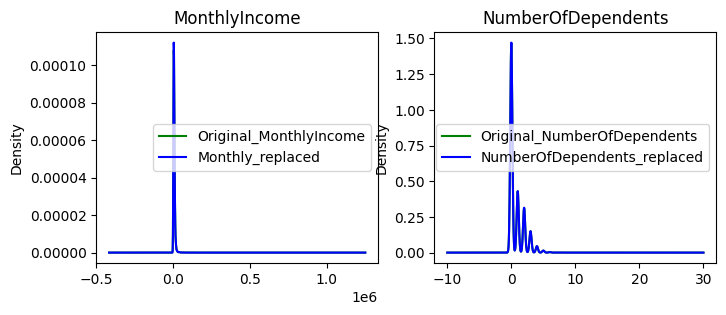

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('MonthlyIncome')
X_test['MonthlyIncome'].plot(kind='kde',color='g',label='Original_MonthlyIncome')
X_test['MonthlyIncome_replaced'].plot(kind='kde',color='b',label='Monthly_replaced')

plt.legend(loc = 0)

plt.subplot(1,2,2)
plt.title('NumberOfDependents')
X_test['NumberOfDependents'].plot(kind='kde',color='g',label='Original_NumberOfDependents')
X_test['NumberOfDependents_replaced'].plot(kind='kde',color='b',label='NumberOfDependents_replaced')

plt.legend(loc = 0)

print(f'Std of MonthlyIncome Feature : {X_test["MonthlyIncome"].std()}')
print(f'Std of MonthlyIncome_replaced Feature : {X_test["MonthlyIncome_replaced"].std()}')
print()
print(f'Std of NumberOfDependents Feature : {X_test["NumberOfDependents"].std()}')
print(f'Std of NumberOfDependents_replaced Feature : {X_test["NumberOfDependents_replaced"].std()}')
plt.show()

In [ ]:
# since null values cleared we can remove original features because proper data was maintained in another feature

X_train = X_train.drop(['MonthlyIncome','NumberOfDependents'],axis=1)
X_test = X_test.drop(['MonthlyIncome','NumberOfDependents'],axis=1)

In [ ]:
# Converting categorical column to numbers column in the data
# From X_train and X_test separate numerical features and categorical features

In [ ]:
X_train_num_cols = X_train.select_dtypes(exclude='object')
X_train_cat_cols = X_train.select_dtypes(include='object')

X_test_num_cols = X_test.select_dtypes(exclude='object')
X_test_cat_cols = X_test.select_dtypes(include='object')

In [ ]:
# converting X_train_cat_cols to numbers and same we need to apply on X_test_cat_cols
X_train_cat_cols.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
135986,Male,West,Rented,Self_Emp,Professional
48361,Female,East,Rented,Officer1,Post-Grad
146561,Male,South,Ownhouse,Self_Emp,Professional
57742,Male,East,Ownhouse,Officer3,Professional
43651,Male,North,Ownhouse,Self_Emp,Post-Grad


In [ ]:
# Gender and region comes under nominal part -> OneHotEncoder
# Rented_ownhouse,occupation and education are ordinal part -> OrdinalEncoder

In [ ]:
X_train_cat_cols.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(X_train_cat_cols[['Gender','Region']])
f = one_hot.transform(X_train_cat_cols[['Gender','Region']]).toarray()
v = pd.DataFrame(data=f)
v.columns = one_hot.get_feature_names_out()

X_train_cat_cols = pd.concat([X_train_cat_cols,v],axis=1)
X_train_cat_cols

,Gender,Region,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,Male,West,Rented,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Female,East,Rented,Officer1,Post-Grad,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Male,South,Ownhouse,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Male,East,Ownhouse,Officer3,Professional,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Male,North,Ownhouse,Self_Emp,Post-Grad,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134995,Male,West,Ownhouse,Self_Emp,Graduate,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134996,Male,West,Ownhouse,Self_Emp,PhD,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134997,Male,East,Rented,Officer1,Professional,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134998,Male,South,Rented,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# we are going to use OrdinalEncoding on rented_ownhouse,occupation and education features

from sklearn.preprocessing import OrdinalEncoder
od_en = OrdinalEncoder()
od_en.fit(X_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])
p = od_en.transform(X_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])

f = pd.DataFrame(data=p)
f.columns = od_en.get_feature_names_out()

In [ ]:
od_en.categories_

[array(['Ownhouse', 'Rented'], dtype=object),
 array(['Non-officer', 'Officer1', 'Officer2', 'Officer3', 'Self_Emp'],
       dtype=object),
 array(['Graduate', 'Matric', 'PhD', 'Post-Grad', 'Professional'],
       dtype=object)]

In [ ]:
f

,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,1.0,3.0
2,0.0,4.0,4.0
3,0.0,3.0,4.0
4,0.0,4.0,3.0
...,...,...,...
134995,0.0,4.0,0.0
134996,0.0,4.0,2.0
134997,1.0,1.0,4.0
134998,1.0,4.0,4.0


In [ ]:
X_train_cat_cols.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Gender_Female', 'Gender_Male', 'Region_Central', 'Region_East',
       'Region_North', 'Region_South', 'Region_West'],
      dtype='object')

In [ ]:
X_train_cat_cols = X_train_cat_cols.drop(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)
X_train_cat_cols

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134996,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134997,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134998,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_cat_cols = pd.concat([X_train_cat_cols,f],axis=1)
X_train_cat_cols.head()

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0


In [ ]:
# same things we can assigning to test data
p = one_hot.transform(X_test_cat_cols[['Gender','Region']]).toarray()
f = od_en.transform(X_test_cat_cols[['Rented_OwnHouse', 'Occupation', 'Education']])

In [ ]:
p_ = pd.DataFrame(data=p)
p_.columns = one_hot.get_feature_names_out()
p_.head()

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
f_ = pd.DataFrame(data=f)
f_.columns = od_en.get_feature_names_out()
f_.head()

,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,3.0,3.0
2,1.0,1.0,3.0
3,1.0,0.0,4.0
4,1.0,2.0,4.0


In [ ]:
g = pd.concat([p_,f_],axis=1)
g.head()

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [ ]:
X_test_cat_cols = X_test_cat_cols.drop(['Gender','Region','Rented_OwnHouse', 'Occupation', 'Education'],axis=1)
X_test_cat_cols.head()

""
59770
21362
127324
140509
144297


In [ ]:
X_test_cat_cols.reset_index(drop=True,inplace=True)

In [ ]:
X_test_cat_cols = pd.concat([X_test_cat_cols,g],axis=1)
X_test_cat_cols.head()

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [ ]:
# X_train_num_cols and X_test_num_cols
# finding whether num_cols from X_train and X_test -> Normal Distribution or not

In [ ]:
X_train_num_cols.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_replaced,NumberOfDependents_replaced
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,8137.0,4.0


In [ ]:
def fun(data,var):
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  data[var].plot(kind='kde')

  plt.subplot(1,3,2)
  sns.boxplot(x = data[var])

  plt.subplot(1,3,3)
  stats.probplot(data[var],dist='norm',plot=plt)
  plt.show()

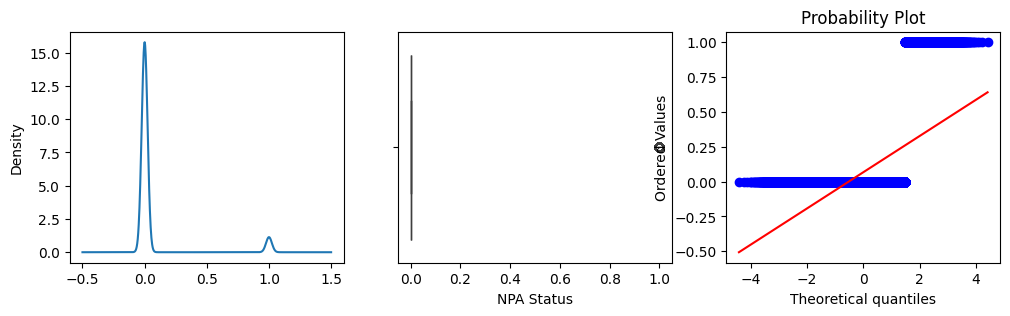

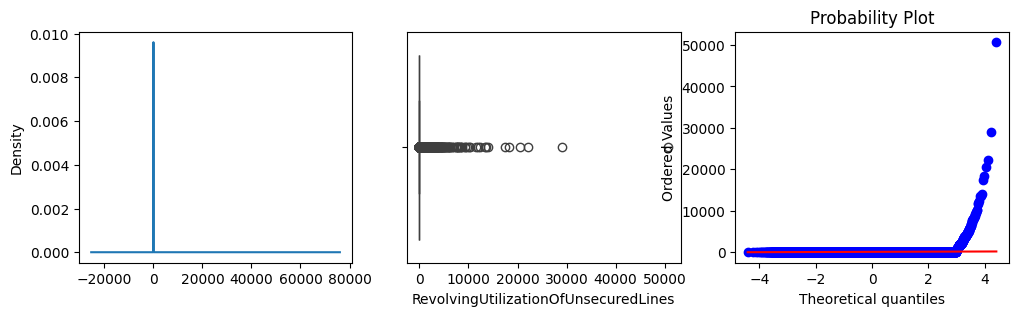

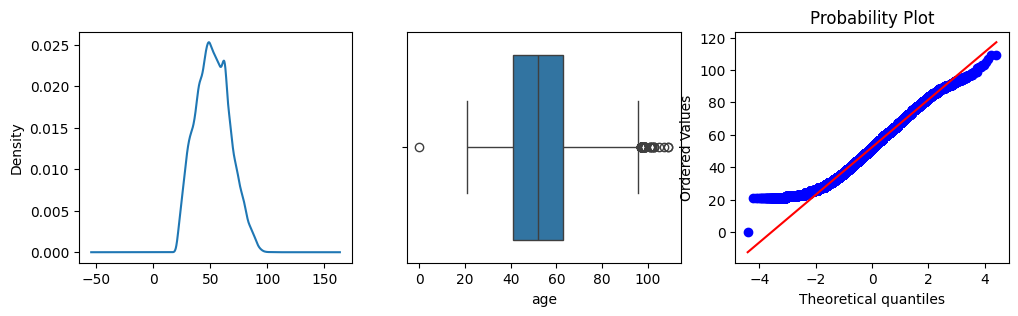

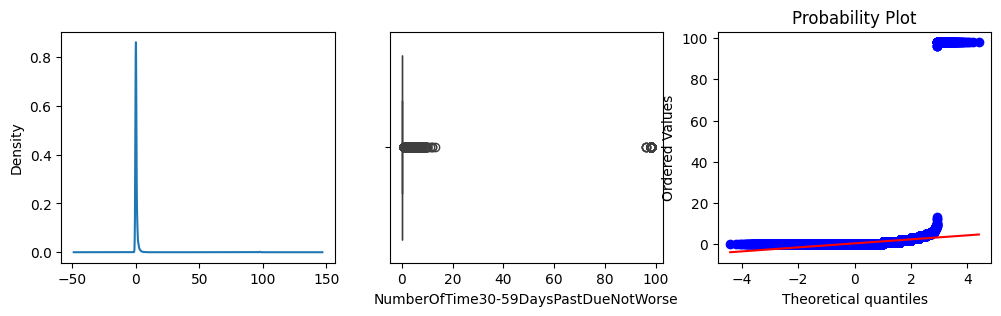

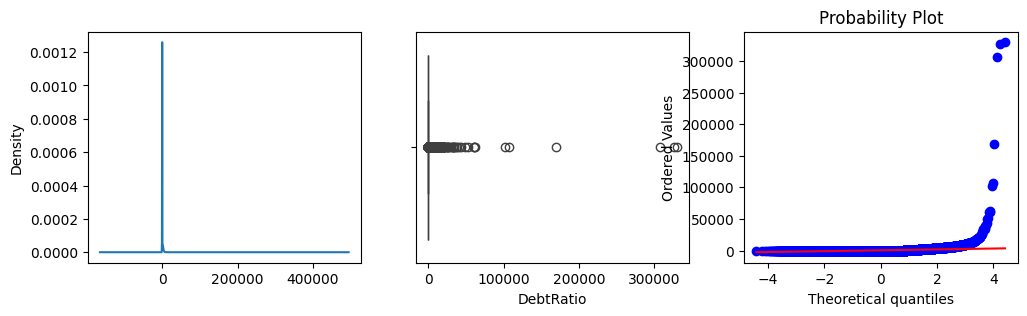

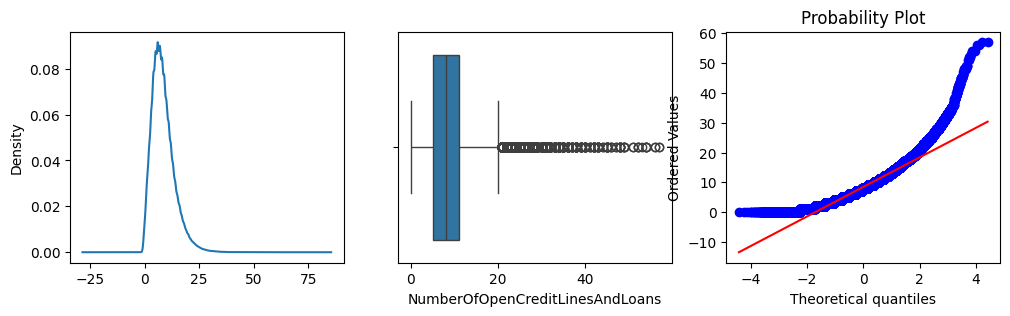

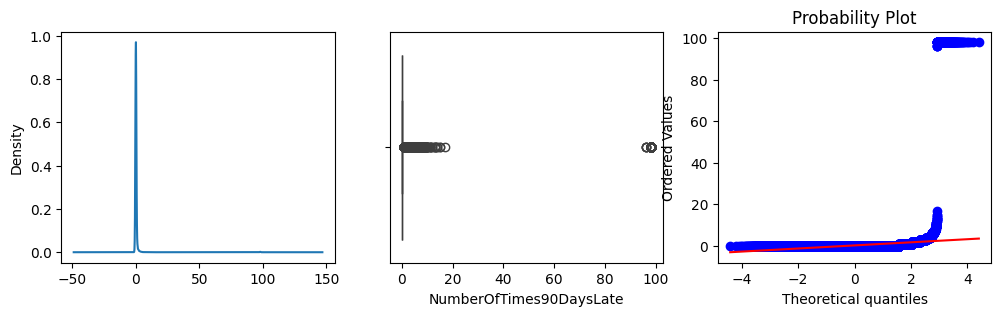

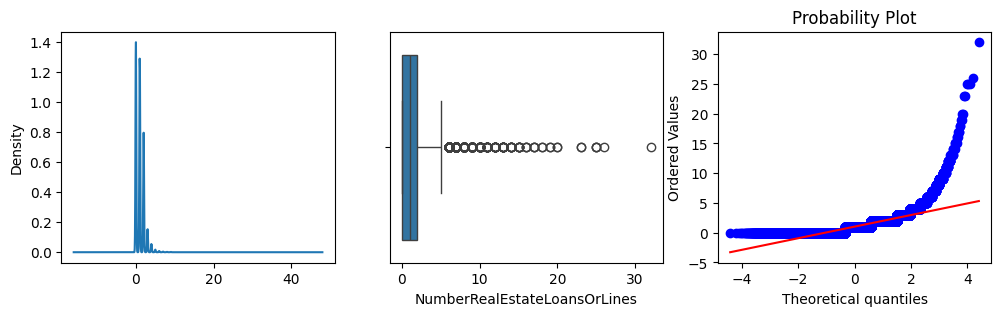

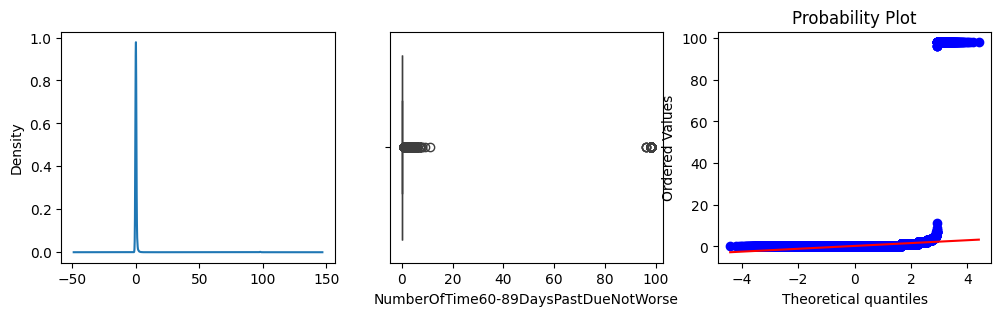

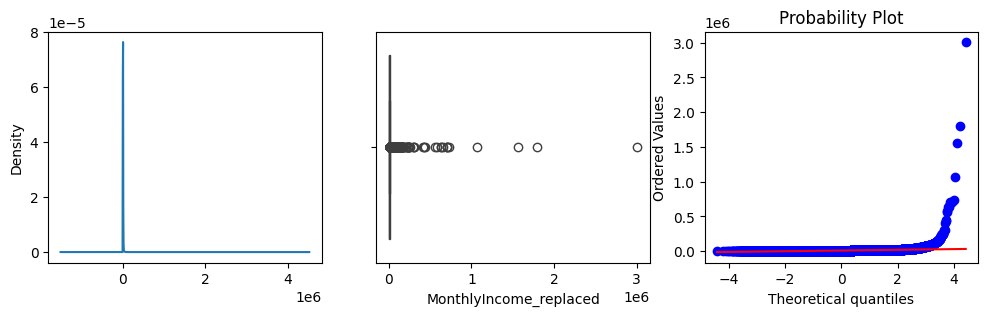

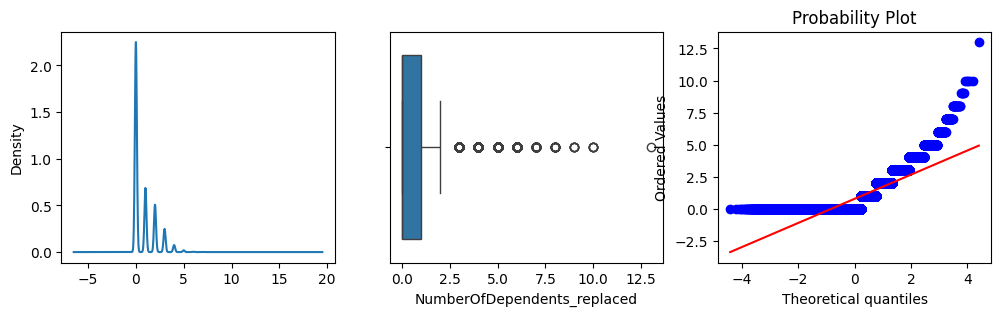

In [ ]:
for i in X_train_num_cols.columns:
  fun(X_train_num_cols,i)

In [ ]:
# Applying log for X_train_num_cols to main Normal Distribution and reduce the outliers
X_train_num_cols.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_replaced,NumberOfDependents_replaced
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,8137.0,4.0


In [ ]:
for i in X_train_num_cols.columns:
  X_train_num_cols[i+'_log'] = np.log(X_train_num_cols[i] + 1)

In [ ]:
X_train_num_cols.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced',
       'NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

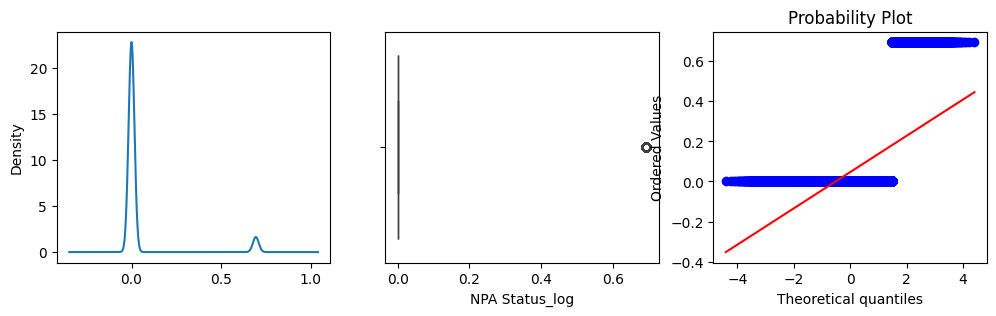

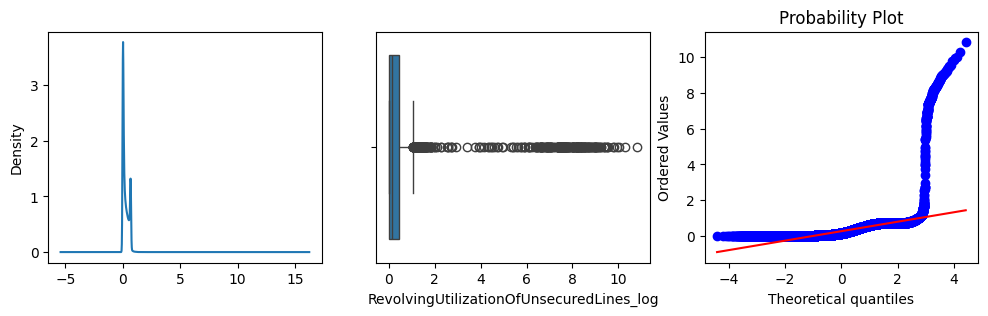

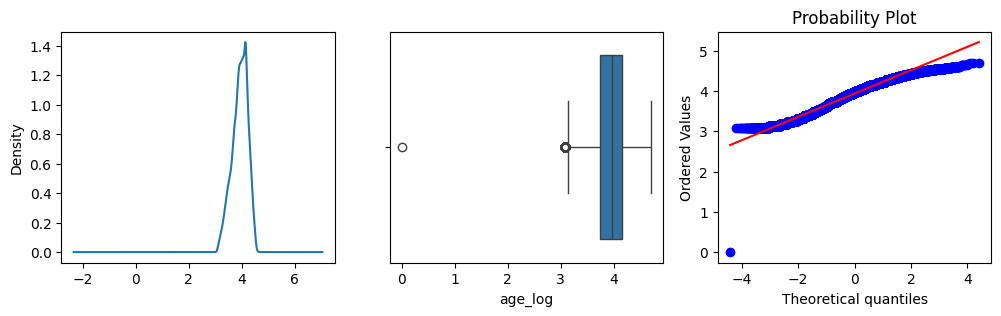

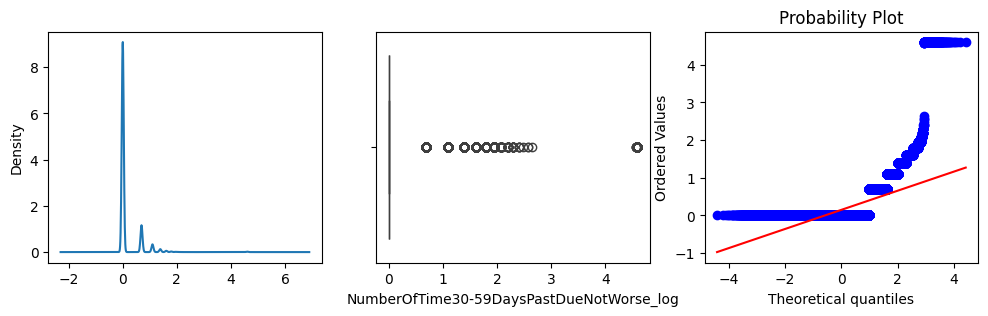

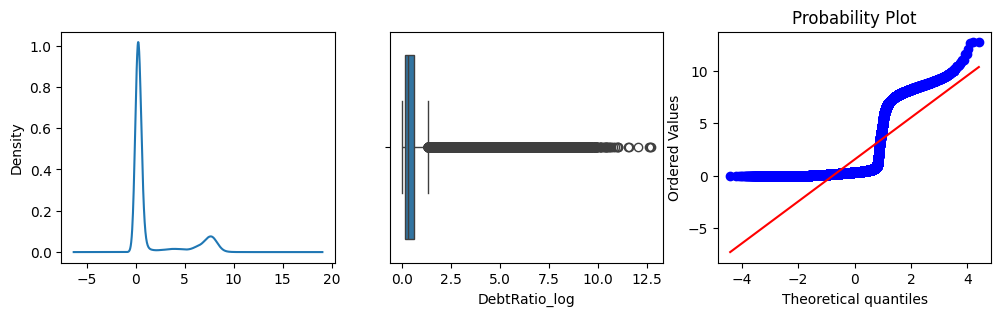

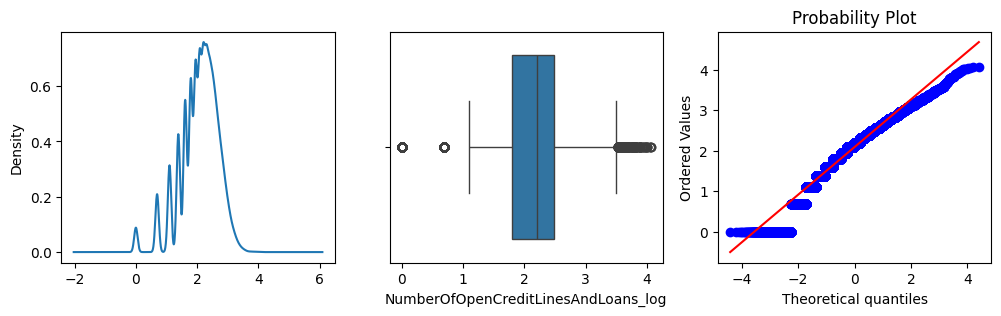

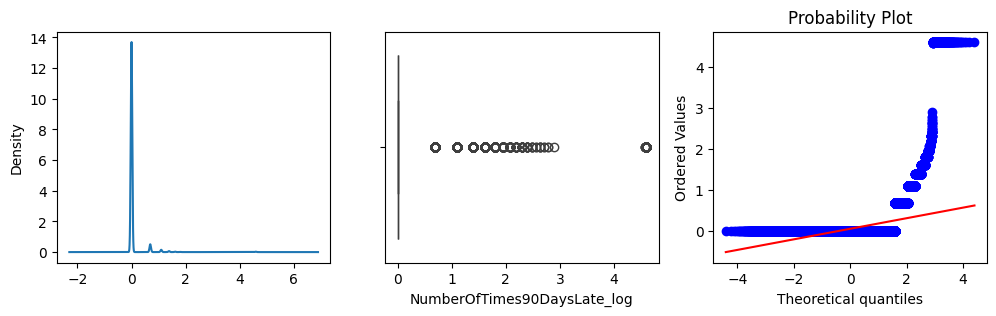

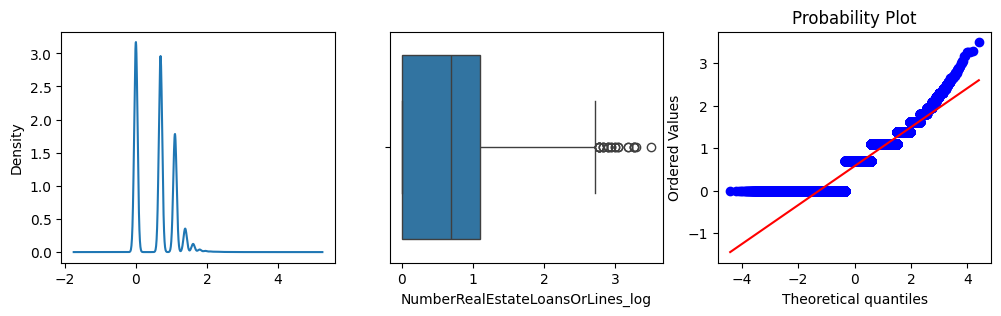

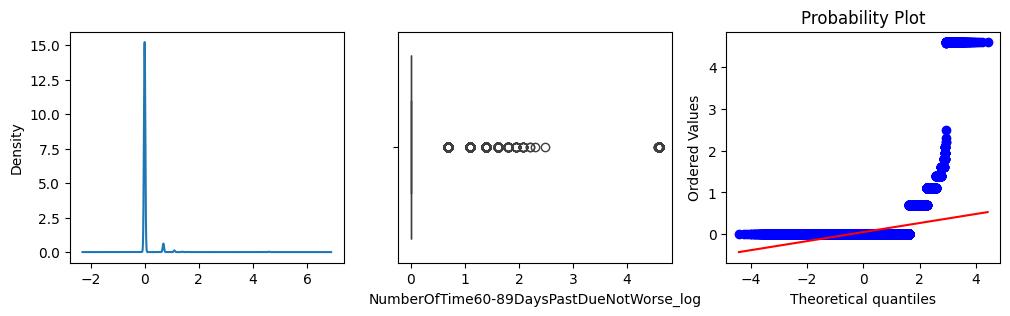

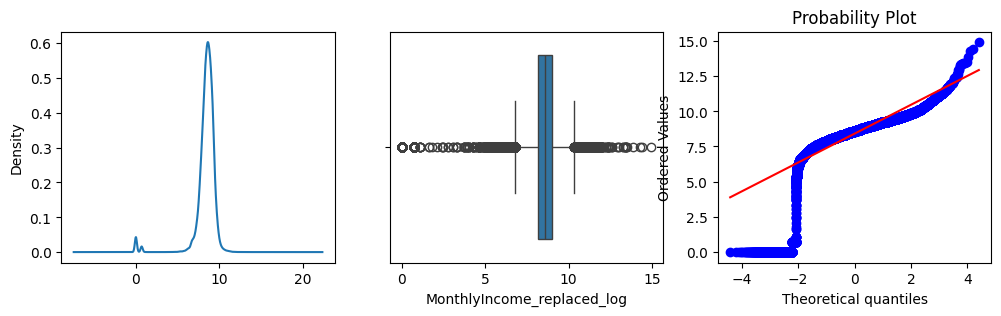

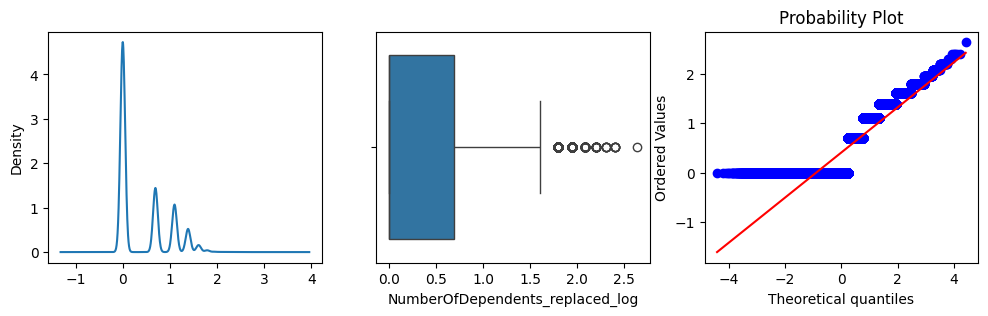

In [ ]:
for i in X_train_num_cols.columns:
  if '_log' in i:
    fun(X_train_num_cols,i)

In [ ]:
X_train_num_cols = X_train_num_cols.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
                                          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
                                          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                                          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                                          'MonthlyIncome_replaced', 'NumberOfDependents_replaced'],axis=1)

In [ ]:
X_train_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

In [ ]:
# same log technique we will apply on X_test

for i in X_test_num_cols.columns:
  X_test_num_cols[i+'_log'] = np.log(X_test_num_cols[i]+1)

X_test_num_cols = X_test_num_cols.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
                                          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
                                          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                                          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                                          'MonthlyIncome_replaced', 'NumberOfDependents_replaced'],axis=1)
X_test_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

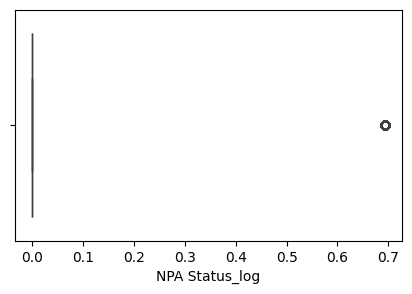

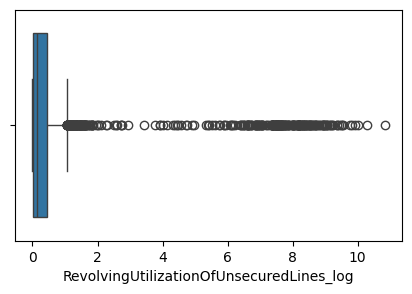

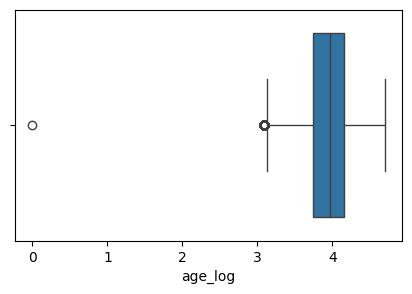

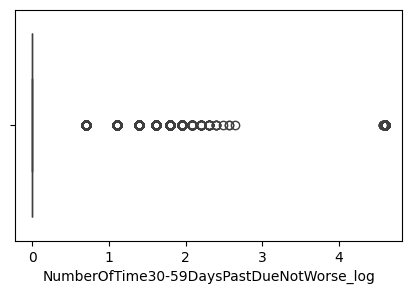

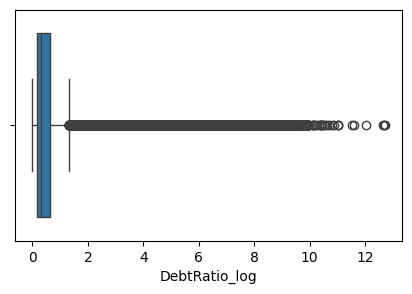

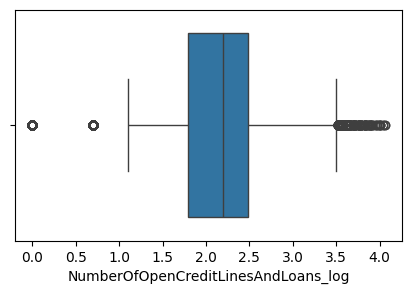

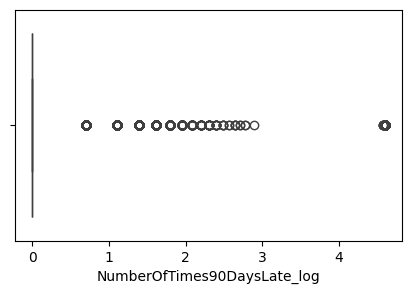

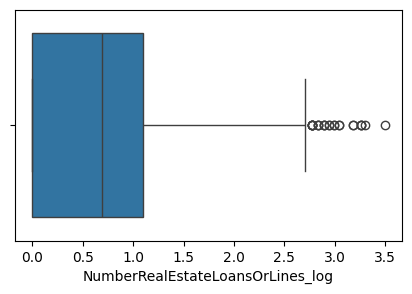

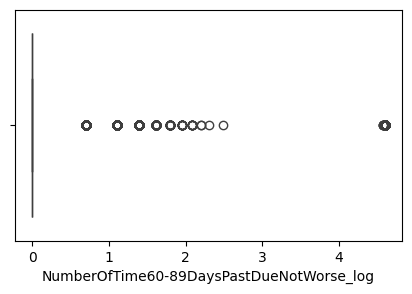

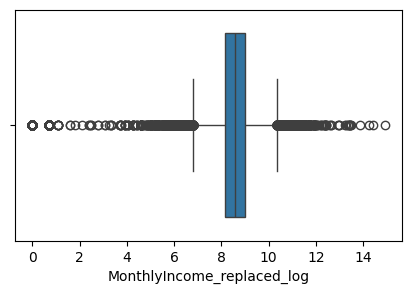

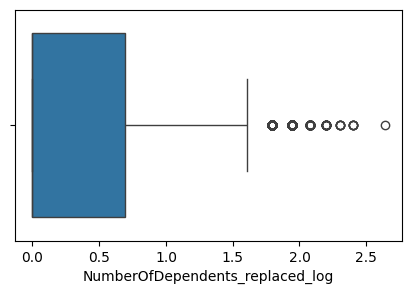

In [ ]:
# Handle Outliers

def han_out(X_train_num_cols,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x = X_train_num_cols[var])
  plt.show()

for i in X_train_num_cols.columns:
  han_out(X_train_num_cols,i)

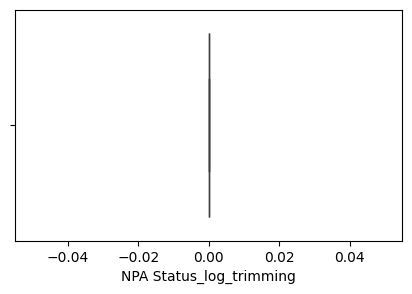

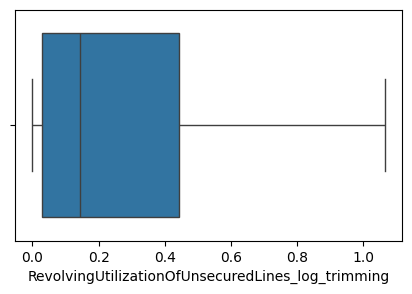

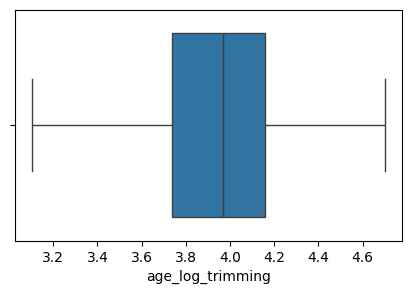

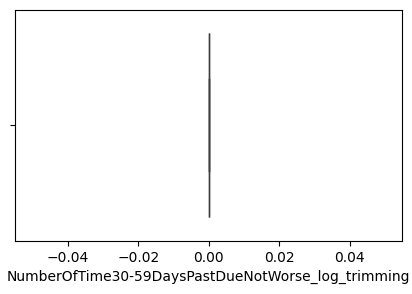

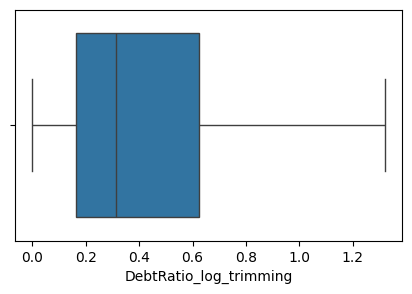

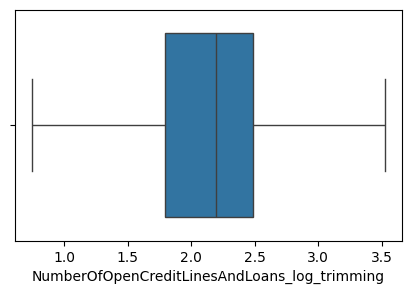

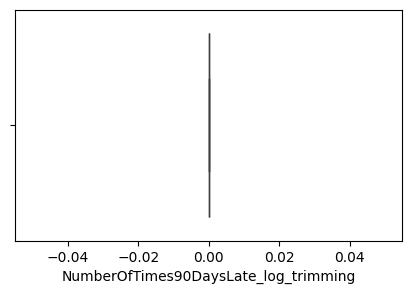

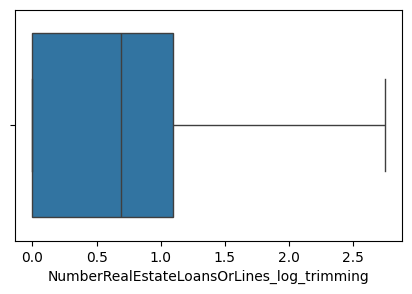

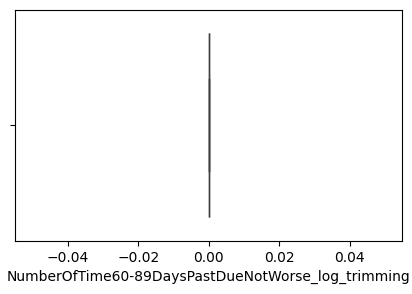

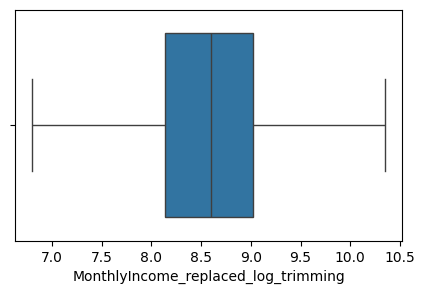

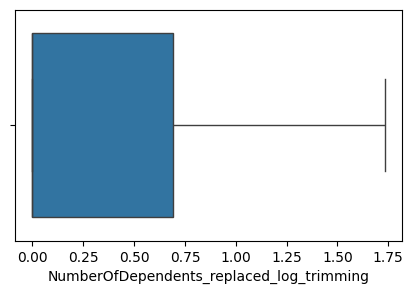

In [ ]:
# trimming on X_train_num_cols
def fun_1(df,var):
  iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
  upper = df[var].quantile(0.75) + (1.5 * iqr)
  lower = df[var].quantile(0.25) - (1.5 * iqr)
  return upper,lower

for i in X_train_num_cols.columns:
  upper_value,lower_value = fun_1(X_train_num_cols,i)
  X_train_num_cols[i+'_trimming'] = np.where(X_train_num_cols[i] > upper_value,upper_value,
                                    np.where(X_train_num_cols[i] < lower_value,lower_value,X_train_num_cols[i]))

for j in X_train_num_cols.columns:
  if '_trimming' in j:
    han_out(X_train_num_cols,j)

In [ ]:
X_train_num_cols = X_train_num_cols.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
                                        'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
                                        'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
                                        'NumberRealEstateLoansOrLines_log',
                                        'NumberOfTime60-89DaysPastDueNotWorse_log',
                                        'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)
X_train_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

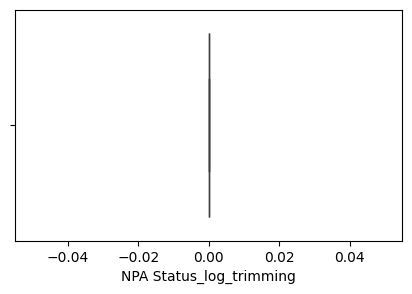

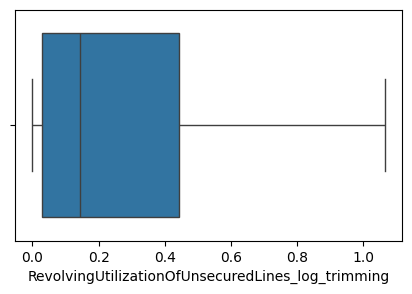

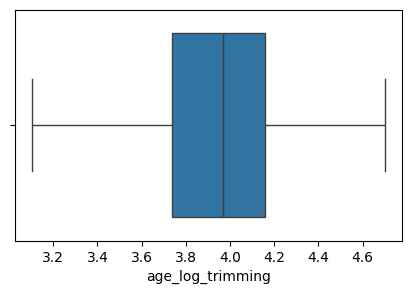

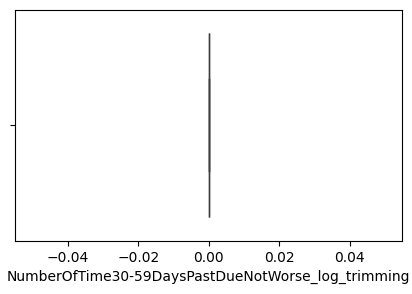

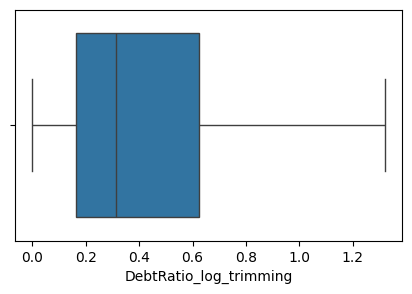

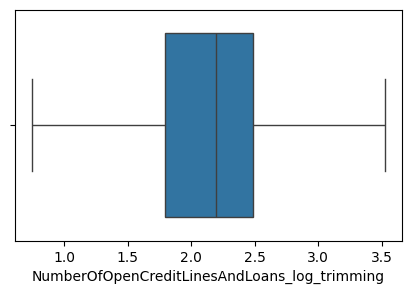

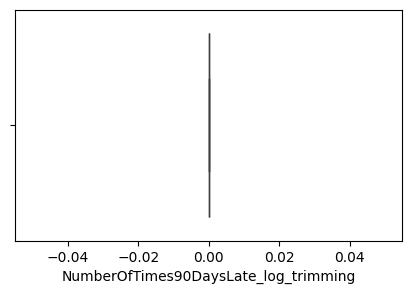

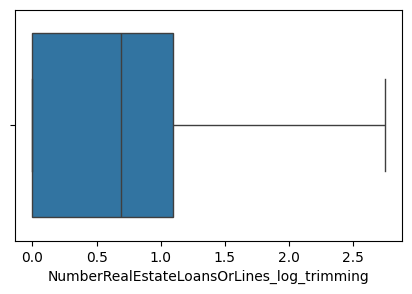

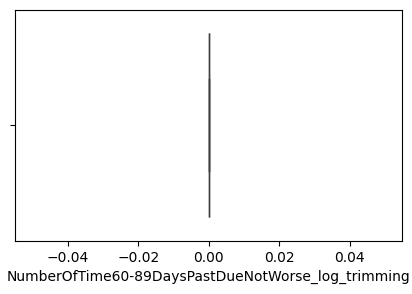

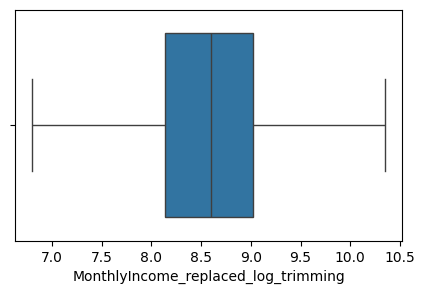

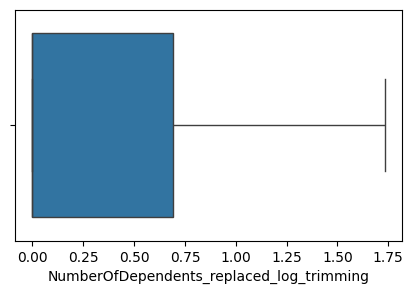

In [ ]:
for j in X_train_num_cols.columns:
  han_out(X_train_num_cols,j)

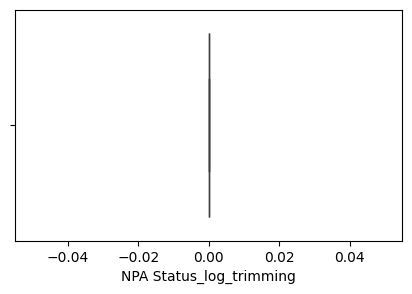

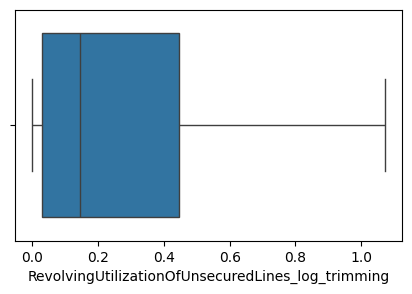

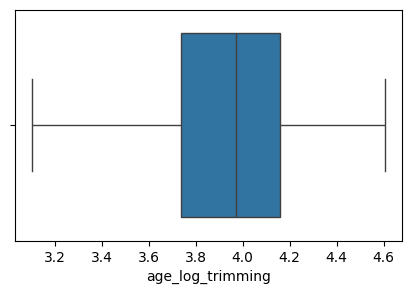

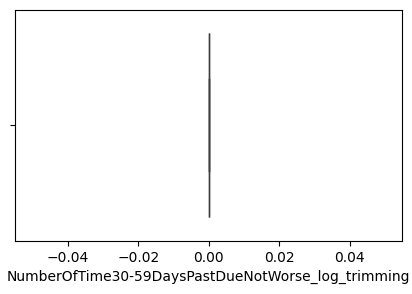

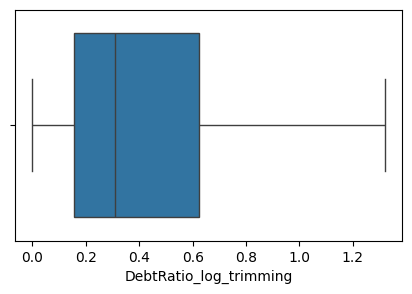

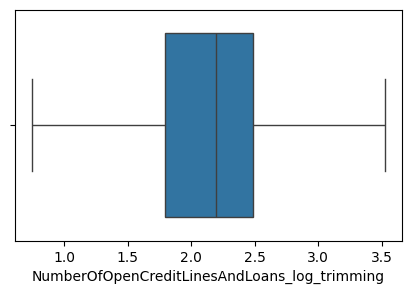

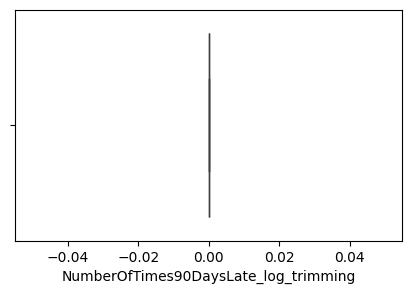

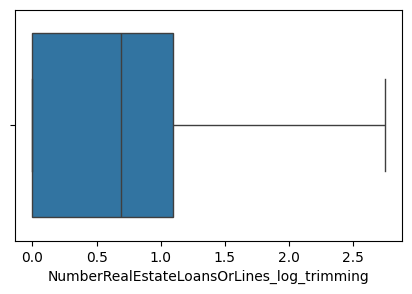

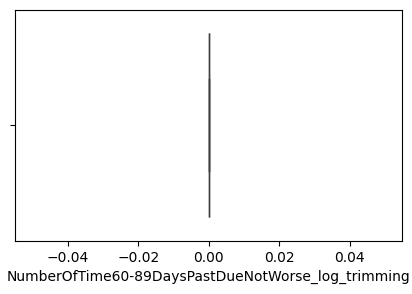

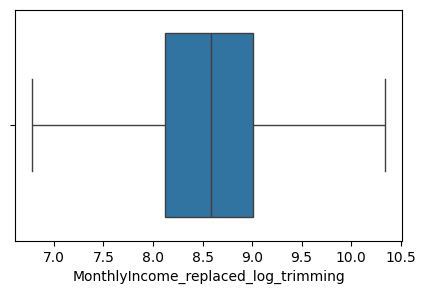

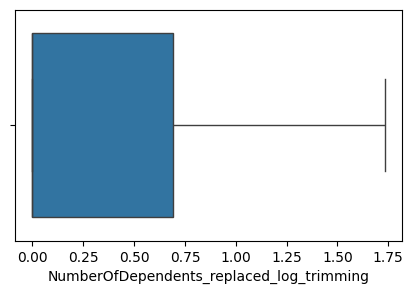

In [ ]:
# same operations we are going to update on X_test_num_cols
def fun_1(df,var):
  iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
  upper = df[var].quantile(0.75) + (1.5 * iqr)
  lower = df[var].quantile(0.25) - (1.5 * iqr)
  return upper,lower

for i in X_test_num_cols.columns:
  upper_value,lower_value = fun_1(X_test_num_cols,i)
  X_test_num_cols[i+'_trimming'] = np.where(X_test_num_cols[i] > upper_value,upper_value,
                                    np.where(X_test_num_cols[i] < lower_value,lower_value,X_test_num_cols[i]))

for j in X_test_num_cols.columns:
  if '_trimming' in j:
    han_out(X_test_num_cols,j)

In [ ]:
X_test_num_cols = X_test_num_cols.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
                                        'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
                                        'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
                                        'NumberRealEstateLoansOrLines_log',
                                        'NumberOfTime60-89DaysPastDueNotWorse_log',
                                        'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)
X_test_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [ ]:
X_train_num_cols.reset_index(drop=True,inplace=True)

In [ ]:
# join the  data as it is

X_train_cleaned = pd.DataFrame()
X_train_cleaned = pd.concat([X_train_num_cols,X_train_cat_cols],axis=1)
X_train_cleaned.head(7)

,NPA Status_log_trimming,RevolvingUtilizationOfUnsecuredLines_log_trimming,age_log_trimming,NumberOfTime30-59DaysPastDueNotWorse_log_trimming,DebtRatio_log_trimming,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberOfTimes90DaysLate_log_trimming,NumberRealEstateLoansOrLines_log_trimming,NumberOfTime60-89DaysPastDueNotWorse_log_trimming,MonthlyIncome_replaced_log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.459287,3.688879,0.0,1.320412,1.386294,0.0,0.000000,0.0,9.023288,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
1,0.0,0.411962,4.189655,0.0,0.250661,1.791759,0.0,0.000000,0.0,8.026497,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,0.0,0.134501,4.025352,0.0,0.394841,2.833213,0.0,1.386294,0.0,9.669915,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
3,0.0,0.539652,3.784190,0.0,0.126901,2.484907,0.0,0.000000,0.0,8.679822,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,0.0,0.000000,3.912023,0.0,1.320412,3.091042,0.0,1.098612,0.0,9.004300,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0
5,0.0,0.051363,3.332205,0.0,1.320412,2.197225,0.0,1.098612,0.0,8.843759,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.001446,3.931826,0.0,0.458924,2.197225,0.0,1.098612,0.0,8.891787,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


In [ ]:
X_train_cleaned.shape

(135000, 21)

In [ ]:
# final test_data
X_test_num_cols.reset_index(drop=True,inplace=True)
X_test_cleaned = pd.DataFrame()
X_test_cleaned = pd.concat([X_test_num_cols,X_test_cat_cols],axis=1)
X_test_cleaned.head(7)

,NPA Status_log_trimming,RevolvingUtilizationOfUnsecuredLines_log_trimming,age_log_trimming,NumberOfTime30-59DaysPastDueNotWorse_log_trimming,DebtRatio_log_trimming,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberOfTimes90DaysLate_log_trimming,NumberRealEstateLoansOrLines_log_trimming,NumberOfTime60-89DaysPastDueNotWorse_log_trimming,MonthlyIncome_replaced_log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.693147,3.433987,0.0,1.319470,0.752039,0.0,0.000000,0.0,8.944811,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,0.0,0.000000,4.060443,0.0,0.133273,2.302585,0.0,0.693147,0.0,8.955577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,0.0,0.035916,3.891820,0.0,0.212118,1.945910,0.0,1.098612,0.0,8.699681,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,0.702271,3.737670,0.0,0.151121,1.609438,0.0,0.000000,0.0,8.508959,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,0.697537,3.912023,0.0,1.319470,2.397895,0.0,0.693147,0.0,8.920122,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
5,0.0,0.003225,4.382027,0.0,1.319470,1.945910,0.0,0.000000,0.0,8.151045,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.117320,3.891820,0.0,0.476775,2.708050,0.0,1.098612,0.0,9.524202,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0


In [ ]:
X_test_cleaned.shape

(15000, 21)

In [ ]:
# checking column names are matching or not exactly
c1 = []
for i,j in enumerate(X_test_cleaned.columns):
  if X_test_cleaned.columns[i] == j:
    pass
  else:
    c1.append()
print(c1)

[]


In [ ]:
# Feature selection

In [ ]:
# constant -> any column variance is zero means we can remove that column
vt = VarianceThreshold(threshold=0.0)
vt.fit(X_train_cleaned)

VarianceThreshold()

In [ ]:
sum(vt.get_support())

17

In [ ]:
X_train_cleaned.columns[vt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_train_cleaned.columns[~vt.get_support()]

Index(['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],
      dtype='object')

In [ ]:
X_train_cleaned = X_train_cleaned.drop(['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],axis=1)
X_test_cleaned = X_test_cleaned.drop(['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],axis=1)

In [ ]:
X_test_cleaned.shape

(15000, 17)

In [ ]:
# quasi_constant -> variance should be 0.1
vt = VarianceThreshold(threshold=0.1)
vt.fit(X_train_cleaned)

VarianceThreshold(threshold=0.1)

In [ ]:
sum(vt.get_support())

15

In [ ]:
X_train_cleaned.columns[vt.get_support()]

Index(['DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [ ]:
X_train_cleaned.columns[~vt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'], dtype='object')

In [ ]:
X_train_cleaned = X_train_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'],axis=1)
X_test_cleaned = X_test_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'],axis=1)

In [ ]:
X_test_cleaned.shape

(15000, 15)

In [ ]:
# we have 15 columns, now we are going to apply Hypothesis testing and find the best columns for model development

In [ ]:
# Hypothesis testing corelation [pearson_correlation] and p_value
y_train.head()

,Good_Bad
135986,Good
48361,Good
146561,Good
57742,Good
43651,Good


In [ ]:
# using the label encoding technique we are going to convert into numbers
lb_t = LabelEncoder()
lb_t.fit(y_train)
print(lb_t.classes_)
f = lb_t.transform(y_train)
y_train_n = pd.DataFrame(data = f,columns = ['target'])
y_test_n = pd.DataFrame(data = lb_t.transform(y_test),columns = ['target'])

['Bad' 'Good']


In [ ]:
co = []
for i in X_train_cleaned.columns:
  s = pearsonr(X_train_cleaned[i] , y_train_n['target'])
  co.append(s)

co = np.array(co)
co

array([[-2.77387698e-03,  3.08117517e-01],
       [ 5.31930632e-02,  3.52330620e-85],
       [ 3.03772236e-02,  6.13291349e-29],
       [ 4.49011212e-02,  3.32752062e-61],
       [-4.48391733e-02,  4.85299943e-61],
       [ 4.20244543e-03,  1.22571480e-01],
       [-4.20244543e-03,  1.22571480e-01],
       [ 1.58105363e-01,  0.00000000e+00],
       [ 5.08703457e-02,  4.68890954e-78],
       [-2.30943778e-02,  2.13009730e-17],
       [ 2.53738610e-04,  9.25721909e-01],
       [-2.05015130e-01,  0.00000000e+00],
       [-4.40387195e-03,  1.05645630e-01],
       [-1.02077928e-03,  7.07619652e-01],
       [ 3.41408808e-02,  4.09213501e-36]])

In [ ]:
p_value = pd.Series(co[: , 1] , index = X_train_cleaned.columns)
p_value

,0
DebtRatio_log_trimming,3.081175e-01
NumberOfOpenCreditLinesAndLoans_log_trimming,3.523306e-85
NumberRealEstateLoansOrLines_log_trimming,6.132913e-29
MonthlyIncome_replaced_log_trimming,3.327521e-61
NumberOfDependents_replaced_log_trimming,4.852999e-61
Gender_Female,1.225715e-01
Gender_Male,1.225715e-01
Region_Central,0.000000e+00
Region_East,4.688910e-78
Region_North,2.130097e-17


In [ ]:
k = []
g = list(p_value)
for i in p_value:
  if i > 0.05:
    k.append(g.index(i))
print(k)

[0, 5, 5, 10, 12, 13]


<Axes: >

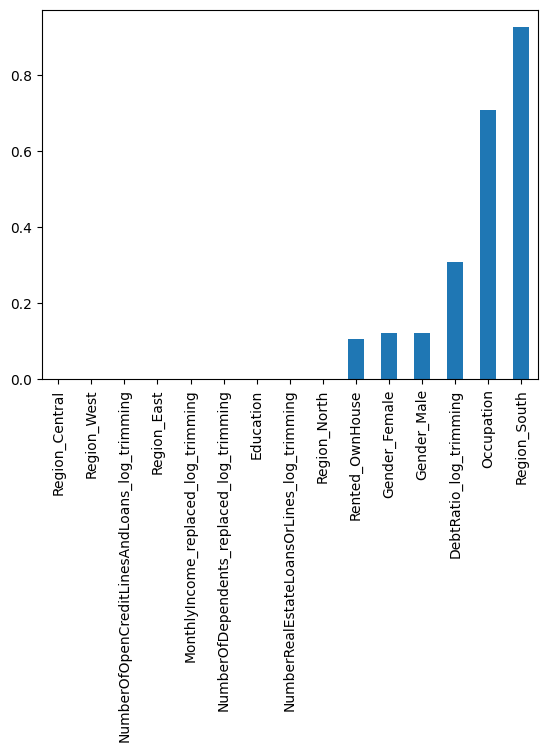

In [ ]:
p_value.sort_values(ascending = True).plot.bar()

In [ ]:
X_train_cleaned = X_train_cleaned.drop(['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)
X_test_cleaned = X_test_cleaned.drop(['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)

In [ ]:
# final data
X_train_cleaned.sample(10)

,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberRealEstateLoansOrLines_log_trimming,MonthlyIncome_replaced_log_trimming,NumberOfDependents_replaced_log_trimming,Region_Central,Region_East,Region_North,Region_West,Education
16863,2.639057,1.098612,9.392745,0.000000,1.0,0.0,0.0,0.0,0.0
2908,1.386294,0.000000,8.060540,1.098612,0.0,0.0,1.0,0.0,3.0
18721,1.098612,0.000000,7.558517,0.000000,0.0,0.0,1.0,0.0,3.0
115094,2.197225,0.693147,8.622454,0.000000,0.0,1.0,0.0,0.0,3.0
123417,2.484907,0.693147,8.881975,1.386294,0.0,1.0,0.0,0.0,4.0
75366,1.609438,0.000000,7.626083,1.098612,0.0,0.0,1.0,0.0,3.0
35629,3.332205,0.693147,9.047939,1.098612,0.0,0.0,1.0,0.0,0.0
117279,1.609438,0.693147,7.824446,1.098612,1.0,0.0,0.0,0.0,0.0
77684,2.197225,0.000000,8.476580,0.000000,1.0,0.0,0.0,0.0,0.0
129601,0.752039,0.000000,9.433564,0.000000,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_cleaned.shape

(135000, 9)

In [ ]:
X_test_cleaned.sample(10)

,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberRealEstateLoansOrLines_log_trimming,MonthlyIncome_replaced_log_trimming,NumberOfDependents_replaced_log_trimming,Region_Central,Region_East,Region_North,Region_West,Education
13434,2.079442,1.386294,8.888895,1.386294,1.0,0.0,0.0,0.0,0.0
5922,0.752039,0.000000,9.392745,0.693147,0.0,1.0,0.0,0.0,4.0
4983,2.484907,1.386294,9.376024,0.693147,1.0,0.0,0.0,0.0,0.0
6544,2.302585,0.693147,8.294300,0.693147,0.0,0.0,0.0,1.0,4.0
10311,2.197225,0.000000,8.699681,0.000000,0.0,0.0,0.0,0.0,2.0
3122,1.609438,1.098612,8.517393,1.098612,0.0,0.0,0.0,0.0,1.0
6677,1.386294,0.000000,7.647309,0.000000,1.0,0.0,0.0,0.0,3.0
3397,2.302585,0.000000,6.987490,0.000000,0.0,1.0,0.0,0.0,4.0
3244,1.945910,0.000000,7.466799,0.000000,0.0,0.0,0.0,0.0,4.0
9835,1.098612,0.000000,7.927324,1.098612,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_cleaned.shape

(15000, 9)

In [ ]:
y_train_n['target'].value_counts()

,count
target,
1,125935
0,9065


In [ ]:
y_train_n = np.array(y_train_n).ravel()
y_test_n = np.array(y_test_n).ravel()

In [ ]:
# using upsampling we are going to balance the data
!pip install imblearn

In [ ]:
print('Labels count for Bad 0 = {}'.format(sum(y_train_n == 0)))
print('Labels count for Good 1 = {}'.format(sum(y_train_n == 1)))
print()

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_up , y_train_up = sm.fit_resample(X_train_cleaned,y_train_n)

print('Labels count after for Bad 0 = {}'.format(sum(y_train_up == 0)))
print('Labels count aftef for Good 1 = {}'.format(sum(y_train_up == 1)))

Labels count for Bad 0 = 9065
Labels count for Good 1 = 125935

Labels count after for Bad 0 = 125935
Labels count aftef for Good 1 = 125935


In [ ]:
X_train_up.shape

(251870, 9)

In [ ]:
y_train_up.shape

(251870,)

In [ ]:
# The data is balanced , now we need to work on Model development

In [ ]:
def knn_algo(train_x,train_y,test_x,test_y):
  knn = KNeighborsClassifier(n_neighbors=5)  # default k_value is 5
  knn.fit(train_x,train_y)
  y_train_pred = knn.predict(train_x)
  y_test_pred = knn.predict(test_x)
  print(f'Train Accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test Accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'Confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

def log_algo(train_x,train_y,test_x,test_y):
  lr = LogisticRegression()
  lr.fit(train_x,train_y)
  y_train_pred = lr.predict(train_x)
  y_test_pred = lr.predict(test_x)
  print(f'Train Accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test Accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'Confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

def nb_algo(train_x,train_y,test_x,test_y):
  nb = GaussianNB()
  nb.fit(train_x,train_y)
  y_train_pred = nb.predict(train_x)
  y_test_pred = nb.predict(test_x)
  print(f'Train Accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test Accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'Confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

def dt_algo(train_x,train_y,test_x,test_y):
  dt = DecisionTreeClassifier()
  dt.fit(train_x,train_y)
  y_train_pred = dt.predict(train_x)
  y_test_pred = dt.predict(test_x)
  print(f'Train Accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test Accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'Confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

def calling(train_x,train_y,test_x,test_y):
  print('----------------knn----------------')
  knn_algo(train_x,train_y,test_x,test_y)
  print('----------------Logistic----------------')
  log_algo(train_x,train_y,test_x,test_y)
  print('----------------Naive----------------')
  nb_algo(train_x,train_y,test_x,test_y)
  print('----------------Decision Tree----------------')
  dt_algo(train_x,train_y,test_x,test_y)

In [ ]:
calling(X_train_up,y_train_up,X_test_cleaned,y_test_n)

----------------knn----------------
Train Accuracy : 0.906693929408028
Test Accuracy : 0.8152666666666667
Confusion Matrix : [[  506   455]
 [ 2316 11723]]
Classification Report :               precision    recall  f1-score   support

           0       0.18      0.53      0.27       961
           1       0.96      0.84      0.89     14039

    accuracy                           0.82     15000
   macro avg       0.57      0.68      0.58     15000
weighted avg       0.91      0.82      0.85     15000

----------------Logistic----------------
Train Accuracy : 0.724421328463096
Test Accuracy : 0.6727333333333333
Confusion Matrix : [[ 763  198]
 [4711 9328]]
Classification Report :               precision    recall  f1-score   support

           0       0.14      0.79      0.24       961
           1       0.98      0.66      0.79     14039

    accuracy                           0.67     15000
   macro avg       0.56      0.73      0.51     15000
weighted avg       0.93      0.67      0

In [ ]:
k_values = np.arange(3,25,2)
k_values

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [ ]:
test_accuracy = []
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_up,y_train_up)
  test_accuracy.append(knn.score(X_test_cleaned,y_test_n))
test_accuracy

[0.8314666666666667,
 0.8152666666666667,
 0.8001333333333334,
 0.7887333333333333,
 0.7826,
 0.7769333333333334,
 0.7716,
 0.7663333333333333,
 0.7642666666666666,
 0.7615333333333333,
 0.7601333333333333]

In [ ]:
# Best Model

In [ ]:
# auc and roc curves

In [ ]:
# knn
knn_algo = KNeighborsClassifier()
knn_algo.fit(X_train_up,y_train_up)
knn_pred = knn_algo.predict(X_test_cleaned)

# Logistic Regression
lr_algo = LogisticRegression()
lr_algo.fit(X_train_up,y_train_up)
lr_pred = lr_algo.predict(X_test_cleaned)

# Naive Bayes
nb_algo = GaussianNB()
nb_algo.fit(X_train_up,y_train_up)
nb_pred = nb_algo.predict(X_test_cleaned)

# Decision Tree
dt_algo = DecisionTreeClassifier()
dt_algo.fit(X_train_up,y_train_up)
dt_pred = dt_algo.predict(X_test_cleaned)


In [ ]:
# give the model outcomes to auc and roc curves

fpr_knn,tpr_knn,threshold = roc_curve(y_test_n,knn_pred)
fpr_lr,tpr_lr,threshold = roc_curve(y_test_n,lr_pred)
fpr_nb,tpr_nb,threshold = roc_curve(y_test_n,nb_pred)
fpr_dt,tpr_dt,threshold = roc_curve(y_test_n,dt_pred)

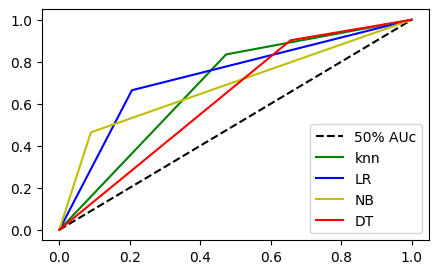

In [ ]:
plt.figure(figsize=(5,3))
plt.plot([0,1],[0,1],"k--",label = '50% AUc')
plt.plot(fpr_knn,tpr_knn,color='g',label='knn')
plt.plot(fpr_lr,tpr_lr,color='b',label='LR')
plt.plot(fpr_nb,tpr_nb,color='y',label='NB')
plt.plot(fpr_dt,tpr_dt,color='r',label='DT')
plt.legend(loc=0)
plt.show()

In [ ]:
# Finally the best model is logistic regression

In [ ]:
X_train_up.columns

Index(['NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Region_Central',
       'Region_East', 'Region_North', 'Region_West', 'Education'],
      dtype='object')

In [ ]:
# New data point

if lr_algo.predict([[4.2,3,1900,2,0,0,1,0,1]])[0] == 1:
  print('good customer')
else:
  print('bad customer')

good customer


In [ ]:
# save the model

In [ ]:
import pickle

In [ ]:
with open('credit_card_project.pkl','wb') as f:
  pickle.dump(lr_algo,f)